In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import QUANTAXIS as QA

#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,8]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

import os

#数据所在目录
p=os.path.join(os.path.abspath(os.curdir),'data')

#日线数据所在目录
daily_path=os.path.join(p,'daily')

import datetime
#日线数据开始日期
s='1990-01-01'
#日线数据结束日期
e='2018-12-31'
#IPO截止日期,000300的数据从这天以后才有，所以从这天开始开始，后面上市的暂不统计
ipo=datetime.datetime(2005,1,1)

In [98]:
#读取信息数据
info_path=os.path.join(p,'info.bz2')
if not os.path.exists(info_path):
    info=pd.DataFrame()
    for index in stock_list.index:
        symbol=stock_list.loc[index]
    #     print('{0} {1}({2}) Start'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),symbol['name'],symbol['code']))
        try:
            i=QA.QAFetch.QATdx.QA_fetch_get_stock_info(symbol['code'])
            if info.empty:
                info=i
            else:
                info=info.append(i)
        except:
            print('{0} Error.'.format(symbol['code']))
            continue
        #     print('{0} {1}({2}) Done'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),symbol['name'],symbol['code']))
    info.head()
    #ipo日期可能有为0的
    info=info[info['ipo_date']!=0]
    info.to_csv(info_path,compression='bz2')
#读取本地info数据
info=pd.read_csv(info_path,compression='bz2',dtype={'code':str})
#只留ipo日期小于ipo设定的数据
info=info[pd.to_datetime(info['ipo_date'],format='%Y%m%d')<=ipo]
info.head()

,Unnamed: 0,market,code,liutongguben,province,industry,updated_date,ipo_date,zongguben,guojiagu,...,touzishouyu,jingyingxianjinliu,zongxianjinliu,cunhuo,lirunzonghe,shuihoulirun,jinglirun,weifenpeilirun,meigujingzichan,baoliu2
0,0,0,000001,1.717025e+10,18,1,20181024,19910403,1.717041e+10,1.801990e+09,...,7.099000e+10,-1.131000e+11,2.556800e+11,0.000000e+00,2.656600e+11,2.045600e+11,2.045600e+11,9.197300e+11,12.54,9.0
1,0,0,000002,9.715170e+09,18,11,20181026,19910129,1.103915e+10,1.901010e+09,...,2.650013e+10,-2.573118e+11,-4.167099e+11,7.078930e+12,3.166211e+11,2.179780e+11,1.398456e+11,8.381792e+11,0.00,9.0
2,0,0,000004,8.301320e+07,18,34,20181031,19910114,8.397670e+07,1.285010e+09,...,3.934700e+07,-2.431500e+07,1.707170e+08,2.102460e+08,-6.873600e+07,-7.308600e+07,-2.591700e+07,3.108930e+08,0.00,9.0
3,0,0,000005,1.057946e+09,18,11,20181228,19901210,1.058537e+09,1.905010e+09,...,-5.289200e+07,-3.354200e+08,-2.689620e+08,4.479651e+09,1.263450e+08,8.579800e+07,6.531900e+07,-4.392743e+09,0.00,9.0
4,0,0,000006,1.348308e+09,18,11,20181027,19920427,1.349995e+09,1.901010e+09,...,2.683746e+09,6.825853e+09,-4.522030e+09,6.763350e+10,6.399546e+09,5.453399e+09,5.032400e+09,2.629079e+10,0.00,9.0


In [104]:
info.shape

(1284, 38)

In [128]:
#找到所有深市的代码列表
df_daily_return=info[info['market']==0][['code','ipo_date']]
df_daily_return=df_daily_return.set_index('code')
df_daily_return['mean']=np.nan
df_daily_return['median']=np.nan
df_daily_return['std']=np.nan
df_daily_return['beta']=np.nan
df_daily_return['alpha']=np.nan
df_daily_return.head()

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
000001,19910403,NaN,NaN,NaN,NaN,NaN
000002,19910129,NaN,NaN,NaN,NaN,NaN
000004,19910114,NaN,NaN,NaN,NaN,NaN
000005,19901210,NaN,NaN,NaN,NaN,NaN
000006,19920427,NaN,NaN,NaN,NaN,NaN


In [129]:
df_daily_return.shape

(497, 6)

In [84]:
df_000300=QA.QAFetch.QATdx.QA_fetch_get_index_day('000300',s,e)['close']
df_000300.head()

date
2005-01-04    982.79
2005-01-05    992.56
2005-01-06    983.17
2005-01-07    983.95
2005-01-10    993.87
Name: close, dtype: float64

In [86]:
# daily_return=pd.DataFrame({'000300':df_000300/df_000300.shift(1)-1})
# daily_return=daily_return.dropna()
# daily_return.head()

# fp=os.path.join(daily_path,'000001.bz2')
# daily=pd.read_csv(fp,compression='bz2')
# daily=daily.set_index('date')
# daily_return['000001']=daily['close']/daily['close'].shift(1)-1
# daily_return['000001']=daily_return['000001'].fillna(0)
# daily_return.head(10)

# beta,alpha = np.polyfit(daily_return['000300'], daily_return['000001'], 1)
# beta,alpha

(1.0437931059654846, 0.00032716551190693245)

In [87]:
columns=['open','close','high','low','volume']
def get_daily_return(symbol,zs='000300'):
    fp=os.path.join(daily_path,symbol+'.bz2')
    if not os.path.exists(fp):
        print('{0} {1} Start'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),symbol))
#         QA.QA_util_log_info('日线数据-不复权 {0}({1})'.format(symbol['name'],symbol['code']))
        df=QA.QAFetch.QATushare.QA_fetch_get_stock_day(symbol,s,e, if_fq='00')
#         QA.QA_util_log_info('日线数据-前复权 {0}({1})'.format(symbol['name'],symbol['code']))
        df_qfq=QA.QAFetch.QATushare.QA_fetch_get_stock_day(symbol,s,e,'01')
#         QA.QA_util_log_info('日线数据-后复权 {0}({1})'.format(symbol['name'],symbol['code']))
        df_hfq=QA.QAFetch.QATushare.QA_fetch_get_stock_day(symbol,s,e,'02')
        df=df[columns].join(df_qfq[columns],rsuffix='_qfq',lsuffix='_bfq').join(df_hfq[columns],rsuffix='_hfq')
        df.to_csv(fp,compression='bz2')
        print('{0} {1} Done'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),symbol))
    
    daily_return=pd.DataFrame({zs:df_000300/df_000300.shift(1)-1})
    daily_return=daily_return.dropna()

    daily=pd.read_csv(fp,compression='bz2')
    daily=daily.set_index('date')
    daily_return[symbol]=daily['close']/daily['close'].shift(1)-1
    daily_return=daily_return.dropna()
    daily_return=daily_return[daily_return[symbol].abs()<0.2]
    
    return daily_return

In [131]:
for symbol in df_daily_return.index:
    print('{0} {1}/{2}'.format(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),df_daily_return.index.get_loc(symbol),len(df_daily_return.index)))
    daily_return=get_daily_return(symbol,'000300')

    #beta值 alpha值
    df_daily_return.loc[symbol,'beta'],df_daily_return.loc[symbol,'alpha'] = np.polyfit(daily_return['000300'], daily_return[symbol], 1)

    #均值
    df_daily_return.loc[symbol,'mean'] = daily_return[symbol].mean()
    #中位数
    df_daily_return.loc[symbol,'median']=daily_return[symbol].median()
    #标准差
    df_daily_return.loc[symbol,'std'] = daily_return[symbol].std()

2019-01-03 11:27:23 0/497
2019-01-03 11:27:23 1/497
2019-01-03 11:27:23 2/497
2019-01-03 11:27:23 3/497
2019-01-03 11:27:24 4/497
2019-01-03 11:27:24 5/497
2019-01-03 11:27:24 6/497
2019-01-03 11:27:24 7/497
2019-01-03 11:27:25 8/497
2019-01-03 11:27:25 9/497
2019-01-03 11:27:25 10/497
2019-01-03 11:27:25 11/497
2019-01-03 11:27:26 12/497
2019-01-03 11:27:26 13/497
2019-01-03 11:27:26 14/497
2019-01-03 11:27:26 15/497
2019-01-03 11:27:27 16/497
2019-01-03 11:27:27 17/497
2019-01-03 11:27:27 18/497
2019-01-03 11:27:27 19/497
2019-01-03 11:27:28 20/497
2019-01-03 11:27:28 21/497
2019-01-03 11:27:28 22/497
2019-01-03 11:27:28 23/497
2019-01-03 11:27:29 24/497
2019-01-03 11:27:29 25/497
2019-01-03 11:27:29 26/497
2019-01-03 11:27:29 27/497
2019-01-03 11:27:30 28/497
2019-01-03 11:27:30 29/497
2019-01-03 11:27:30 30/497
2019-01-03 11:27:30 31/497
2019-01-03 11:27:31 32/497
2019-01-03 11:27:31 33/497
2019-01-03 11:27:31 34/497
2019-01-03 11:27:31 35/497
2019-01-03 11:27:32 36/497
2019-01-03 

2019-01-03 11:28:36 296/497
2019-01-03 11:28:36 297/497
2019-01-03 11:28:37 298/497
2019-01-03 11:28:37 299/497
2019-01-03 11:28:37 300/497
2019-01-03 11:28:37 301/497
2019-01-03 11:28:37 302/497
2019-01-03 11:28:38 303/497
2019-01-03 11:28:38 304/497
2019-01-03 11:28:38 305/497
2019-01-03 11:28:38 306/497
2019-01-03 11:28:39 307/497
2019-01-03 11:28:39 308/497
2019-01-03 11:28:39 309/497
2019-01-03 11:28:39 310/497
2019-01-03 11:28:40 311/497
2019-01-03 11:28:40 312/497
2019-01-03 11:28:40 313/497
2019-01-03 11:28:40 314/497
2019-01-03 11:28:41 315/497
2019-01-03 11:28:41 316/497
2019-01-03 11:28:41 317/497
2019-01-03 11:28:41 318/497
2019-01-03 11:28:41 319/497
2019-01-03 11:28:42 320/497
2019-01-03 11:28:42 321/497
2019-01-03 11:28:42 322/497
2019-01-03 11:28:42 323/497
2019-01-03 11:28:43 324/497
2019-01-03 11:28:43 325/497
2019-01-03 11:28:43 326/497
2019-01-03 11:28:43 327/497
2019-01-03 11:28:43 328/497
2019-01-03 11:28:44 329/497
2019-01-03 11:28:44 330/497
2019-01-03 11:28:44 

In [132]:
df_daily_return.head()

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
000001,19910403,0.000869,0.000000,0.026024,1.094492,0.000413
000002,19910129,0.001367,0.000000,0.028137,1.069316,0.000784
000004,19910114,0.000835,0.001057,0.029775,0.778857,0.000384
000005,19901210,0.000762,0.000000,0.030513,0.985125,0.000306
000006,19920427,0.001172,0.001617,0.032152,1.190470,0.000635


In [133]:
#beta值最小的前10位
df_daily_return.sort_values('beta').head(10)

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
001872,19930505,-0.047025,-0.047025,0.010927,-1.461662,-0.044908
000403,19960628,0.000567,0.000000,0.025626,0.598686,0.000243
000538,19931215,0.001188,0.000000,0.023152,0.626995,0.000874
000557,19940617,0.001031,0.000000,0.030815,0.643965,0.000533
000981,20000622,0.000276,0.000000,0.029373,0.643969,-0.000059
000587,19960425,0.000820,0.000000,0.030203,0.653827,0.000497
000892,19990115,0.000167,0.000000,0.029971,0.655193,-0.000288
000007,19920413,0.001124,0.000000,0.031395,0.662234,0.000653
000895,19981210,0.000858,0.000000,0.024290,0.691688,0.000783


In [134]:
#alpha值最大的前10位
df_daily_return.sort_values('alpha',ascending=False).head(10)

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
000596,19960927,0.001570,0.000588,0.032417,0.931586,0.001266
000651,19961118,0.001685,0.000268,0.026141,0.980938,0.001208
000661,19961218,0.001587,0.001381,0.032718,0.941890,0.001158
002013,20040705,0.001610,0.001690,0.034831,1.121418,0.001156
000333,19931112,0.001380,0.001056,0.024199,1.084512,0.001122
000540,19940202,0.001490,0.001380,0.034274,1.136686,0.001052
000710,19970422,0.001532,0.002657,0.037448,1.007423,0.001051
002007,20040625,0.001384,0.000606,0.027125,0.707596,0.001051
000963,20000127,0.001403,0.000298,0.026662,0.812345,0.001025


In [135]:
#日收益均值最小的前5名
df_daily_return.sort_values('mean').head(5)

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
001872,19930505,-0.047025,-0.047025,0.010927,-1.461662,-0.044908
000693,19970226,-0.000777,0.000000,0.041848,1.046794,-0.002071
000156,20000906,-0.000395,0.000000,0.033311,1.083459,-0.000797
000529,19931118,-0.000269,0.000000,0.028652,1.073488,-0.000434
000620,19961029,-0.000249,0.000000,0.030218,1.079953,-0.000279


In [136]:
#日收益均值最大的前5名
df_daily_return.sort_values('mean',ascending=False).head(5)

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
000651,19961118,0.001685,0.000268,0.026141,0.980938,0.001208
002013,20040705,0.001610,0.001690,0.034831,1.121418,0.001156
000661,19961218,0.001587,0.001381,0.032718,0.941890,0.001158
000596,19960927,0.001570,0.000588,0.032417,0.931586,0.001266
000710,19970422,0.001532,0.002657,0.037448,1.007423,0.001051


In [137]:
#日收益中位数最小的前5名
df_daily_return.sort_values('median').head(5)

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
001872,19930505,-0.047025,-0.047025,0.010927,-1.461662,-0.044908
000001,19910403,0.000869,0.000000,0.026024,1.094492,0.000413
000429,19980220,0.000617,0.000000,0.022124,0.879644,0.000137
000729,19970716,0.000444,0.000000,0.023955,0.889345,0.000067
000728,19970616,0.000406,0.000000,0.032561,1.349343,0.000294


In [138]:
#日收益中位数最大的前5名
df_daily_return.sort_values('median',ascending=False).head(5)

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
000851,19980609,0.000750,0.002906,0.036310,1.130583,0.000246
000151,20000906,0.001035,0.002817,0.035522,1.204182,0.000486
000798,19980212,0.000902,0.002735,0.033427,1.030728,0.000480
000901,19990401,0.000982,0.002687,0.035069,1.083371,0.000421
000710,19970422,0.001532,0.002657,0.037448,1.007423,0.001051


In [139]:
#日收益标准差最小的前5名
df_daily_return.sort_values('std').head(5)

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
001872,19930505,-0.047025,-0.047025,0.010927,-1.461662,-0.044908
000429,19980220,0.000617,0.000000,0.022124,0.879644,0.000137
000538,19931215,0.001188,0.000000,0.023152,0.626995,0.000874
000089,19980420,0.000476,0.000000,0.023207,0.933541,0.000069
000729,19970716,0.000444,0.000000,0.023955,0.889345,0.000067


In [140]:
#日收益标准差最大的前5名
df_daily_return.sort_values('std',ascending=False).head(5)

,ipo_date,mean,median,std,beta,alpha
code,,,,,,
000693,19970226,-0.000777,0.000000,0.041848,1.046794,-0.002071
000681,19970121,0.001329,0.000000,0.037543,0.888971,0.000885
000710,19970422,0.001532,0.002657,0.037448,1.007423,0.001051
000820,19980630,0.000853,0.001609,0.036937,0.962477,0.000295
000025,19930621,0.001372,0.001358,0.036858,0.957662,0.000929


In [141]:
#日收益均值和标准差差额最小的前5名
(df_daily_return['mean'].abs()-df_daily_return['median'].abs()).abs().sort_values().head()

code
001872    0.000000
000025    0.000013
000998    0.000013
002004    0.000017
000685    0.000018
dtype: float64

In [142]:
#日收益均值和标准差差额最大的前5名
(df_daily_return['mean'].abs()-df_daily_return['median'].abs()).abs().sort_values(ascending=False).head()

code
000851    0.002156
000153    0.002055
000890    0.001879
000962    0.001835
000798    0.001834
dtype: float64

In [143]:
daily_return_1=get_daily_return('001872')

In [146]:
daily_return_1

,000300,001872
date,,
2018-12-27,-0.003837,-0.039299
2018-12-28,0.006735,-0.054751


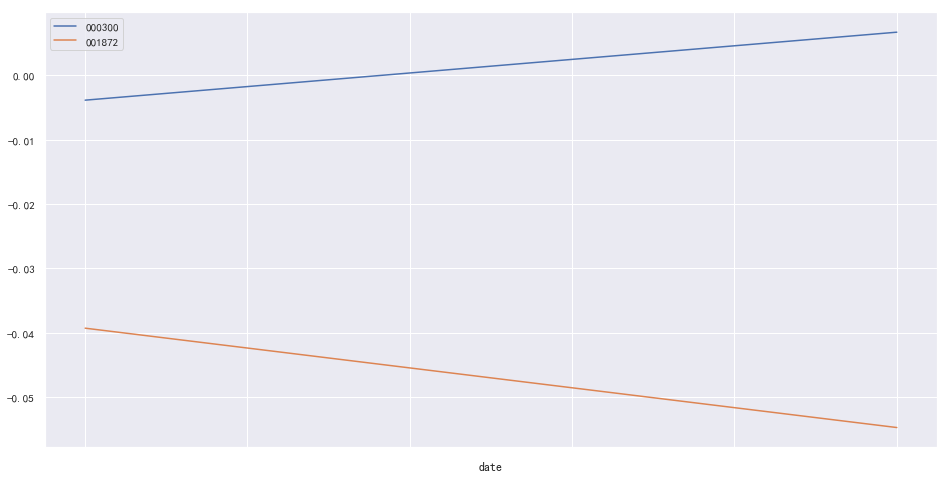

In [144]:
daily_return_1.plot()